In [269]:
import pandas as pd #data manipulation and analysis
import numpy as np #data arrays
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #data visualisation

In [270]:
df = pd.read_csv('C:/Users/zaydm/Downloads/Airline+Passenger+Satisfaction/airline_passenger_satisfaction.csv')
schema = pd.read_csv('C:/Users/zaydm/Downloads/Airline+Passenger+Satisfaction/data_dictionary.csv')

In [271]:
#show all columns of df
pd.set_option('display.max_columns', None)
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied


In [272]:
#change column headings to lower case (easier to work with)
df.columns= df.columns.str.lower()

In [273]:
df.nunique()

id                                        129880
gender                                         2
age                                           75
customer type                                  2
type of travel                                 2
class                                          3
flight distance                             3821
departure delay                              466
arrival delay                                472
departure and arrival time convenience         6
ease of online booking                         6
check-in service                               6
online boarding                                6
gate location                                  6
on-board service                               6
seat comfort                                   6
leg room service                               6
cleanliness                                    6
food and drink                                 6
in-flight service                              6
in-flight wifi servi

In [274]:
df['check-in service'].value_counts()

4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: check-in service, dtype: int64

In [275]:
pd.set_option('display.max_colwidth', None)
schema

,Field,Description
0,ID,Unique passenger identifier
1,Gender,Gender of the passenger (Female/Male)
2,Age,Age of the passenger
3,Customer Type,Type of airline customer (First-time/Returning)
4,Type of Travel,Purpose of the flight (Business/Personal)
5,Class,Travel class in the airplane for the passenger seat
6,Flight Distance,Flight distance in miles
7,Departure Delay,Flight departure delay in minutes
8,Arrival Delay,Flight arrival delay in minutes
9,Departure and Arrival Time Convenience,"Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""


In [276]:
#skewed peak is and size of peak 
#displot hisplot 
#heatmap mean gb - y axis would be services, x axis is airline classes 

In [277]:
df['flight distance'].nsmallest()

29815    31
29823    31
29862    31
29991    31
30077    31
Name: flight distance, dtype: int64

In [278]:
ages = df['age'].unique()

In [279]:
df['satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: satisfaction, dtype: int64

In [280]:
ages

array([48, 35, 41, 50, 49, 43, 60, 38, 28, 27, 24,  9, 52, 70, 61, 11, 42,
       14, 56, 77, 51, 47, 58, 40, 21, 33, 39, 54, 46, 45, 23, 20, 44, 37,
       36, 57, 31, 53, 25, 55, 72, 19, 65, 32, 80,  7, 34, 18, 12, 26, 17,
       66, 68, 67, 59, 69, 16, 22, 64, 29, 10, 71, 30, 62, 63,  8, 15, 73,
       78, 74, 79, 13, 76, 75, 85], dtype=int64)

In [281]:
ages = sorted(set(ages))
ages

[7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 85]

In [282]:
df['arrival delay'] = df['arrival delay'].fillna(0)
df.isnull().sum()

id                                        0
gender                                    0
age                                       0
customer type                             0
type of travel                            0
class                                     0
flight distance                           0
departure delay                           0
arrival delay                             0
departure and arrival time convenience    0
ease of online booking                    0
check-in service                          0
online boarding                           0
gate location                             0
on-board service                          0
seat comfort                              0
leg room service                          0
cleanliness                               0
food and drink                            0
in-flight service                         0
in-flight wifi service                    0
in-flight entertainment                   0
baggage handling                

In [283]:
sat_class = df.groupby(['satisfaction', 'class'])

In [284]:
sat_class['ease of online booking'].value_counts().sort_index().loc['Neutral or Dissatisfied']

class         ease of online booking
Business      0                           284
              1                          3408
              2                          4759
              3                          4822
              4                          3396
              5                          2325
Economy       0                          1413
              1                          8865
              2                         14189
              3                         14160
              4                          6944
              5                          1795
Economy Plus  0                           203
              1                          1308
              2                          1983
              3                          1986
              4                          1109
              5                           503
Name: ease of online booking, dtype: int64

In [285]:
sat_class.agg({'departure and arrival time convenience': 'value_counts', 'ease of online booking': 'value_counts'}).loc['Neutral or Dissatisfied']

departure and arrival time convenience  ease of online booking
class                                                                         
Business     0                                     596                     284
             1                                    3312                    3408
             2                                    4062                    4759
             3                                    4022                    4822
             4                                    3878                    3396
             5                                    3124                    2325
Economy      0                                    2687                    1413
             1                                    5617                    8865
             2                                    6821                   14189
             3                                    7358                   14160
             4                                   13668                    6944
             5                                   11215                    1795
Economy Plus 0                                     184                     203
             1                                     962                    1308
             2                                    1074                    1983
             3                                    1159                    1986
             4                                    1945                    1109
             5                                    1768                     503

In [286]:
#heatmap mean gb - x axis would be services, y axis is airline classes 
heatmap = sat_class.agg({i:'value_counts' for i in df.columns[9:23]}).loc['Neutral or Dissatisfied']
heatmap = heatmap.replace(np.nan,0)
heatmap

departure and arrival time convenience  \
class                                                    
Business     0                                     596   
             1                                    3312   
             2                                    4062   
             3                                    4022   
             4                                    3878   
             5                                    3124   
Economy      0                                    2687   
             1                                    5617   
             2                                    6821   
             3                                    7358   
             4                                   13668   
             5                                   11215   
Economy Plus 0                                     184   
             1                                     962   
             2                                    1074   
             3                                    1159   
             4                                    1945   
             5                                    1768   

                ease of online booking  check-in service  online boarding  \
class                                                                       
Business     0                     284               1.0              132   
             1                    3408            3446.0             2349   
             2                    4759            3439.0             4587   
             3                    4822            5199.0             6914   
             4                    3396            5038.0             4517   
             5                    2325            1871.0              495   
Economy      0                    1413               0.0             1067   
             1                    8865            7540.0             7917   
             2                   14189            7344.0            12912   
             3                   14160           12477.0            14289   
             4                    6944           12781.0             8652   
             5                    1795            7224.0             2529   
Economy Plus 0                     203               0.0              142   
             1                    1308            1263.0             1168   
             2                    1983            1279.0             1923   
             3                    1986            1795.0             2182   
             4                    1109            1800.0             1333   
             5                     503             955.0              344   

                gate location  on-board service  seat comfort  \
class                                                           
Business     0            0.0               5.0           1.0   
             1         3301.0            3065.0        2363.0   
             2         3585.0            4121.0        3665.0   
             3         4934.0            5490.0        6280.0   
             4         4290.0            4262.0        4961.0   
             5         2884.0            2051.0        1724.0   
Economy      0            0.0               0.0           0.0   
             1         6635.0            7587.0        8141.0   
             2         8138.0            8197.0        9209.0   
             3        16165.0           12151.0       10390.0   
             4        12523.0           12022.0       10908.0   
             5         3905.0            7409.0        8718.0   
Economy Plus 0            0.0               0.0           0.0   
             1         1084.0            1227.0        1230.0   
             2         1305.0            1345.0        1467.0   
             3         2222.0            1822.0        1664.0   
             4         1750.0            1729.0        1612.0   
             5          731.0             969.0        1119.0   

             

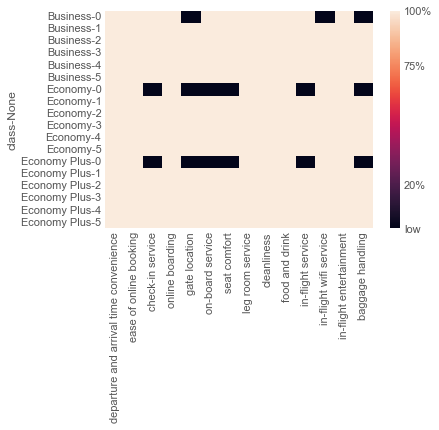

In [287]:
ax = sns.heatmap(heatmap, vmin=0, vmax=1)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .2, .75, 1])
cbar.set_ticklabels(['low', '20%', '75%', '100%'])

In [288]:
heatmap = heatmap.reset_index()

In [289]:
heatmap = heatmap.drop(labels= [0,6,12])


In [290]:
heatmap = heatmap.rename(columns={ 'level_1' : 'score'})

In [291]:
heatmap

,class,score,departure and arrival time convenience,ease of online booking,check-in service,online boarding,gate location,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling
1,Business,1,3312,3408,3446.0,2349,3301.0,3065.0,2363.0,2636,3964.0,3527,1976.0,3974.0,3625.0,1965.0
2,Business,2,4062,4759,3439.0,4587,3585.0,4121.0,3665.0,5175,4519.0,4465,3383.0,6249.0,5226.0,3390.0
3,Business,3,4022,4822,5199.0,6914,4934.0,5490.0,6280.0,5220,4777.0,4451,5143.0,6031.0,5127.0,5183.0
4,Business,4,3878,3396,5038.0,4517,4290.0,4262.0,4961.0,3569,4102.0,3547,5763.0,2645.0,3313.0,5745.0
5,Business,5,3124,2325,1871.0,495,2884.0,2051.0,1724.0,2272,1628.0,2991,2724.0,95.0,1695.0,2711.0
7,Economy,1,5617,8865,7540.0,7917,6635.0,7587.0,8141.0,6586,8199.0,8091,3743.0,9570.0,8494.0,3785.0
8,Economy,2,6821,14189,7344.0,12912,8138.0,8197.0,9209.0,10946,9741.0,10555,5776.0,15737.0,10392.0,5856.0
9,Economy,3,7358,14160,12477.0,14289,16165.0,12151.0,10390.0,11223,10849.0,10612,12054.0,15726.0,10526.0,12430.0
10,Economy,4,13668,6944,12781.0,8652,12523.0,12022.0,10908.0,9965,10247.0,9593,16437.0,6299.0,9661.0,16101.0
11,Economy,5,11215,1795,7224.0,2529,3905.0,7409.0,8718.0,8415,8326.0,8463,9356.0,30.0,8289.0,9194.0


In [292]:
heatmap

,class,score,departure and arrival time convenience,ease of online booking,check-in service,online boarding,gate location,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling
1,Business,1,3312,3408,3446.0,2349,3301.0,3065.0,2363.0,2636,3964.0,3527,1976.0,3974.0,3625.0,1965.0
2,Business,2,4062,4759,3439.0,4587,3585.0,4121.0,3665.0,5175,4519.0,4465,3383.0,6249.0,5226.0,3390.0
3,Business,3,4022,4822,5199.0,6914,4934.0,5490.0,6280.0,5220,4777.0,4451,5143.0,6031.0,5127.0,5183.0
4,Business,4,3878,3396,5038.0,4517,4290.0,4262.0,4961.0,3569,4102.0,3547,5763.0,2645.0,3313.0,5745.0
5,Business,5,3124,2325,1871.0,495,2884.0,2051.0,1724.0,2272,1628.0,2991,2724.0,95.0,1695.0,2711.0
7,Economy,1,5617,8865,7540.0,7917,6635.0,7587.0,8141.0,6586,8199.0,8091,3743.0,9570.0,8494.0,3785.0
8,Economy,2,6821,14189,7344.0,12912,8138.0,8197.0,9209.0,10946,9741.0,10555,5776.0,15737.0,10392.0,5856.0
9,Economy,3,7358,14160,12477.0,14289,16165.0,12151.0,10390.0,11223,10849.0,10612,12054.0,15726.0,10526.0,12430.0
10,Economy,4,13668,6944,12781.0,8652,12523.0,12022.0,10908.0,9965,10247.0,9593,16437.0,6299.0,9661.0,16101.0
11,Economy,5,11215,1795,7224.0,2529,3905.0,7409.0,8718.0,8415,8326.0,8463,9356.0,30.0,8289.0,9194.0


In [293]:
business_class = df['class'] = 'business'
cropped_heatmap = df.groupby(['satisfaction', 'class']).agg({i:'value_counts' for i in df.columns[9:23]}).loc['Neutral or Dissatisfied'].replace(np.nan,0).iloc[1:6].droplevel(0).transpose().round(0)
cropped_heatmap


,1,2,3,4,5
departure and arrival time convenience,9891.0,11957.0,12539.0,19491.0,16107.0
ease of online booking,13581.0,20931.0,20968.0,11449.0,4623.0
check-in service,12249.0,12062.0,19471.0,19619.0,10050.0
online boarding,11434.0,19422.0,23385.0,14502.0,3368.0
gate location,11020.0,13028.0,23321.0,18563.0,7520.0
on-board service,11879.0,13663.0,19463.0,18013.0,10429.0
seat comfort,11734.0,14341.0,18334.0,17481.0,11561.0
leg room service,10263.0,17785.0,18139.0,14961.0,11912.0
cleanliness,13434.0,15836.0,17370.0,15786.0,11012.0
food and drink,12848.0,16731.0,16748.0,14492.0,12556.0


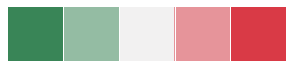

In [294]:

sns.palplot(sns.diverging_palette(140, 10, n=5))


Text(0.5, 1.0, 'Heatmap of Scores')

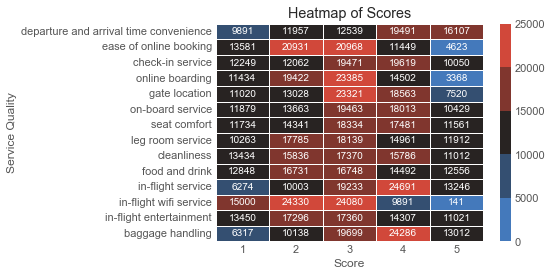

In [299]:
palette = sns.diverging_palette(250, 15, s=75, l=50 , n=5, center='dark')

ax = sns.heatmap(cropped_heatmap, linewidths=1, annot=True, fmt='0.0f', 
cmap = palette , vmin=0,vmax=25000)
plt.xlabel('Score')
plt.ylabel('Service Quality')
plt.title('Heatmap of Scores')



In [296]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
